# EDA - 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ur1 = "/content/BIKE DETAILS.csv"
df = pd.read_csv(ur1)
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


1.What is the range of selling prices in the dataset?

In [ ]:
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling prices is {selling_price_range}")

The range of selling prices is 755000


2.What is the median selling price for bike in the dataset?

In [ ]:
median_selling_price = df['selling_price'].median()
print(f"The median selling price is {median_selling_price}")

The median selling price is 45000.0


3.What is the most common seller type?

In [ ]:
most_commom_seller_type = df['seller_type'].mode()[0]
print(f"The most common seller type is {most_commom_seller_type}")

The most common seller type is Individual


4.How many bikes have driven more than 50,000 kilometer?

In [ ]:
bikes_over_50000_km = df[df['km_driven'] > 50000]
print(f"There are {len(bikes_over_50000_km)} bikes that have driven more than 50,000 kilometers.")

There are 170 bikes that have driven more than 50,000 kilometers.


5.What is the average km_driven value for each ownership type?

In [ ]:
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:")
print(average_km_driven_by_ownership)


Average km_driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6.What proportion of bike are from the year 2015 or older?

In [ ]:
bike_2015_or_older = df[df['year'] >= 2015]
total_bikes = df.shape[0]
proportion_bike_2015_or_older = len(bike_2015_or_older) / len(df)
print(f"Proportion of bikes from 2015 or older: {proportion_bike_2015_or_older:.2f}")

Proportion of bikes from 2015 or older: 0.53


7.What is the trend of missing values across the dataset?

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8.What is the highest ex_showroom_price recoded, and for which bike?

In [ ]:
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_ex_showroom_price = df[df['ex_showroom_price'] == max_ex_showroom_price]
print(f"The highest ex_showroom_price is {max_ex_showroom_price}")
print("Bike with the highest ex_showroom_price:")
print(bike_with_max_ex_showroom_price)

The highest ex_showroom_price is 1278000.0
Bike with the highest ex_showroom_price:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


9.What is the total number of bikes  listed by each seller type?

In [ ]:
bikes_by_seller_type = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10.What is the relationship between selling_price and km_driven for first-owner bikes?

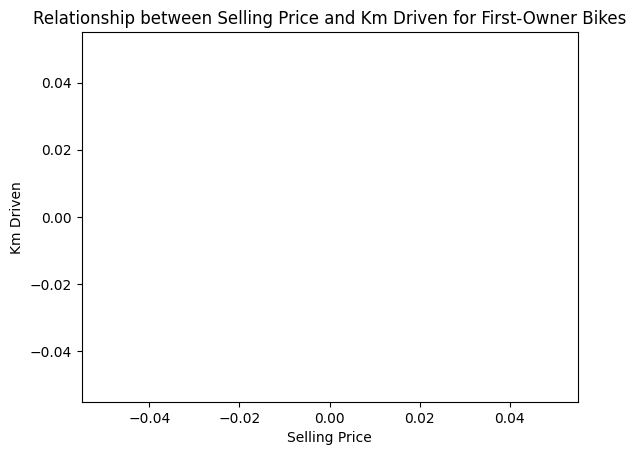

In [ ]:
first_owner_bikes = df[df['owner'] == 'First Owner']
plt.scatter(first_owner_bikes['selling_price'], first_owner_bikes['km_driven'])
plt.xlabel('Selling Price')
plt.ylabel('Km Driven')
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.show()

11.Identify and remove outliers in the km_driven column using the IQR method?

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Outliers removed from the 'km_driven' column.")
print(df)

Outliers removed from the 'km_driven' column.
                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  

12.Perform a bivariate analysis to visualize the relationship between year and selling_price.

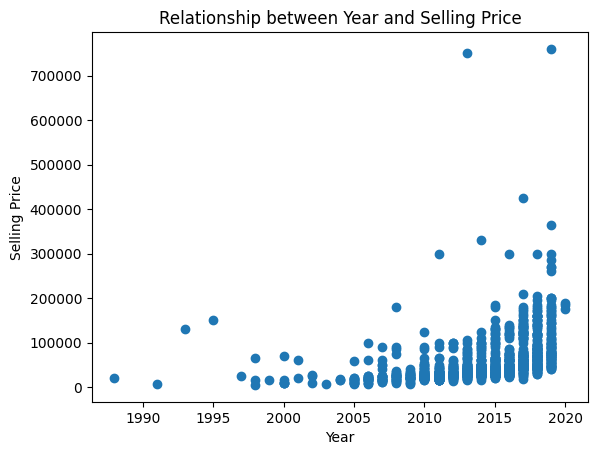

In [ ]:
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()

13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [ ]:
current_year = 2025
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
average_depreciation = df['depreciation'].mean()
print(f"The average depreciation in selling price is {average_depreciation}")


The average depreciation in selling price is 28346.930348258706


14.Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_year'] = df['year'].map(average_price_by_year)
df['price_difference'] = df['selling_price'] - df['average_price_year']
significantly_above_avg = df[df['price_difference'] > 2 * df['selling_price']]
print("Bike names priced significantly above the average price for their manufacturing year:")
print(significantly_above_avg['name'])

Bike names priced significantly above the average price for their manufacturing year:
Series([], Name: name, dtype: object)


15.Develop a correlation matrix for numeric columns and visulize it using it using a heatmap.

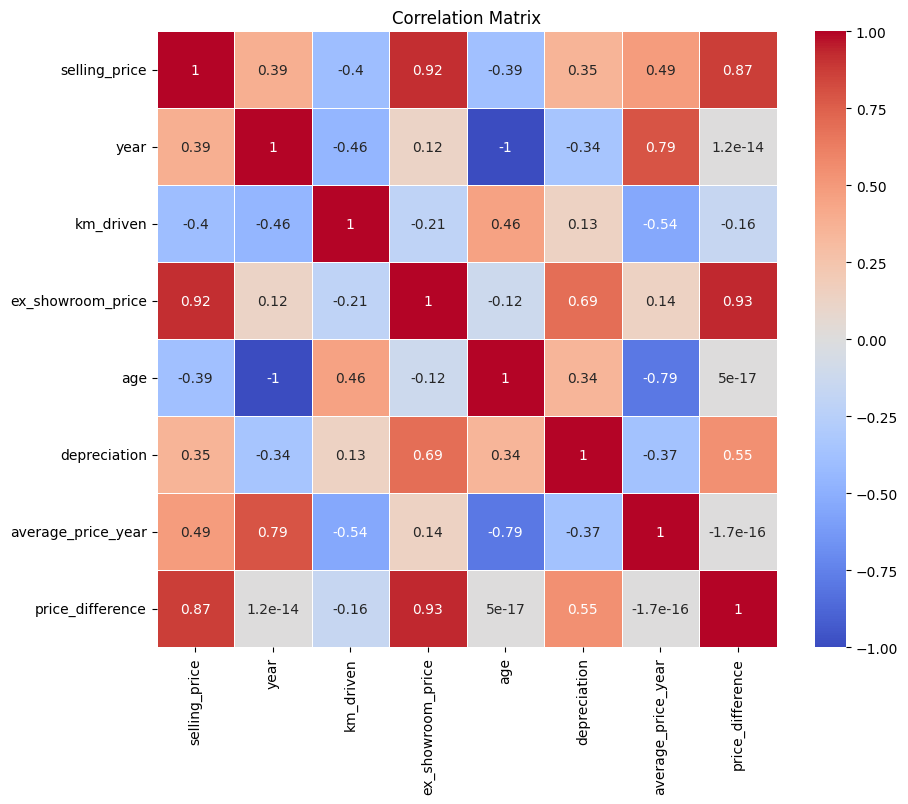

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# EDA - 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ur1 = "/content/Car Sale.csv"
df = pd.read_csv(ur1)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


1.What is the average selling price of cars for each dealer,and how many does it compare across different dealers?

In [ ]:
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price of cars for each dealer:")
print(avg_price_per_dealer)

Average selling price of cars for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                           

2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [ ]:
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Variation in prices for each car brand:")
print(price_variation)

Variation in prices for each car brand:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


3.What is the distribution of car prices across different regions?

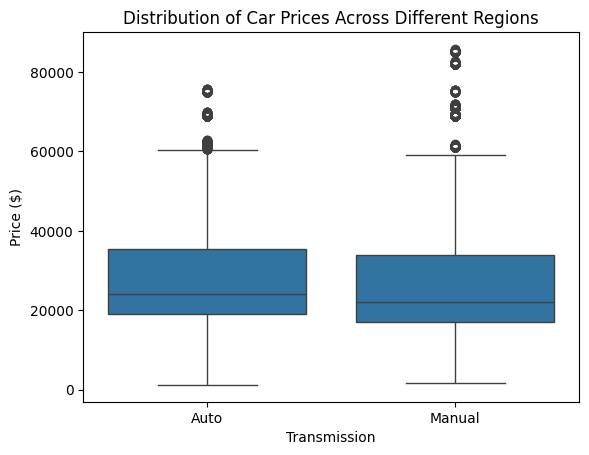

In [ ]:
sns.boxplot(x= 'Transmission', y= 'Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Regions')
plt.show()

4.What is the distribution of car prices across different regions?

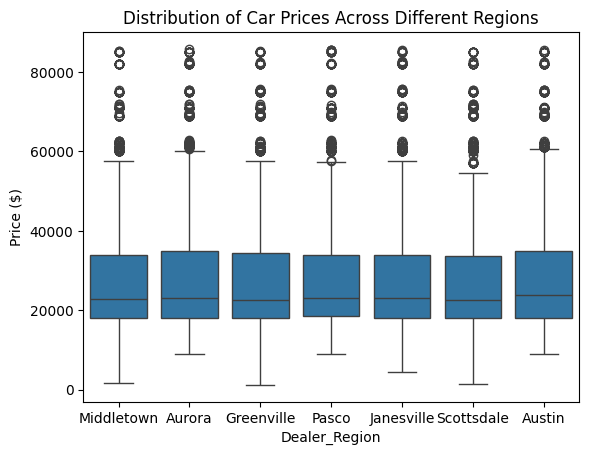

In [ ]:
sns.boxplot(x= 'Dealer_Region', y= 'Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Regions')
plt.show()

5.What is the distribution of cars based on body styles?

In [ ]:
body_style_dist = df['Body Style'].value_counts()
print("Distribution of cars based on body styles:")
print(body_style_dist)

Distribution of cars based on body styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


6.How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
avg_price_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print("Average selling price of cars by customer gender and annual income:")
print(avg_price_gender_income)

Average selling price of cars by customer gender and annual income:
Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


7.What is the distribution of car prices by region, and how does the number of car sold vary    by region?

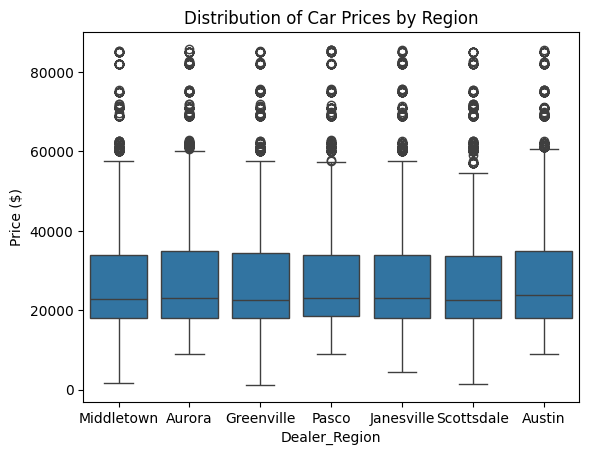

Number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


In [ ]:
sns.boxplot(x= 'Dealer_Region', y= 'Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.show()

cars_sold_by_region = df['Dealer_Region'].value_counts()
print("Number of cars sold by region:")
print(cars_sold_by_region)

8.How does the average car price differ between cars with different engine sizes?

In [ ]:
avg_price_engine = df.groupby('Engine')['Price ($)'].mean()
print("Average car price by engine size:")
print(avg_price_engine)

Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


9.How do car prices vary based on the customer's annual income bracket?

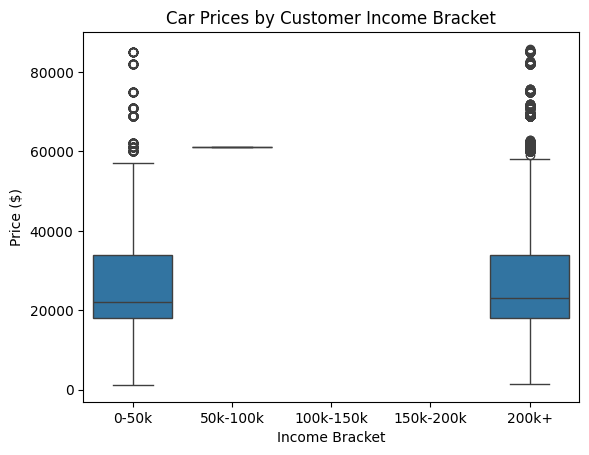

In [ ]:
income_brackets = pd.cut(df['Annual Income'], bins=[0, 20000, 40000, 60000, 80000, np.inf], labels=['0-50k','50k-100k','100k-150k','150k-200k','200k+'])
df['Income Bracket'] = income_brackets
sns.boxplot(x= 'Income Bracket', y= 'Price ($)', data=df)
plt.title('Car Prices by Customer Income Bracket')
plt.show()

10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

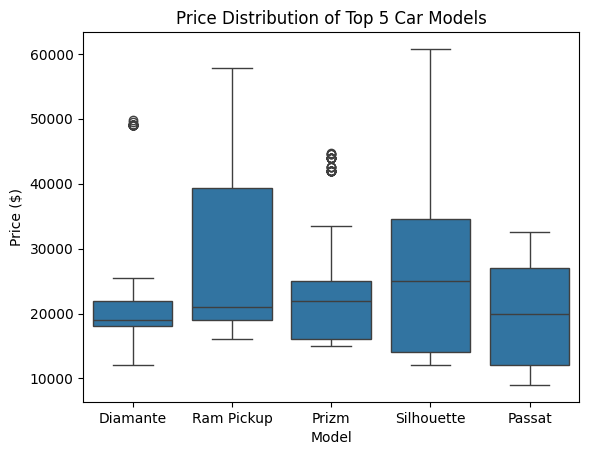

In [ ]:
top_5_models = df['Model'].value_counts().head(5).index
top_5_models_data = df[df['Model'].isin(top_5_models)]
sns.boxplot(x= 'Model', y= 'Price ($)', data=top_5_models_data)
plt.title('Price Distribution of Top 5 Car Models')
plt.show()

11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

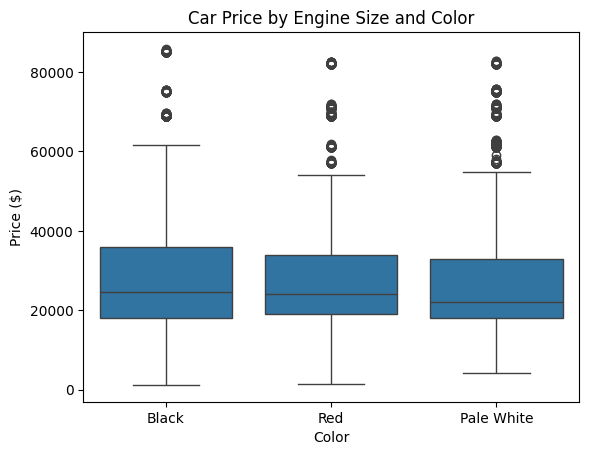

In [ ]:
sns.boxplot(x= 'Color', y= 'Price ($)', data=df)
plt.title('Car Price by Engine Size and Color')
plt.show()

12.Is there any seasonal trend in var sales based on the date of sale?

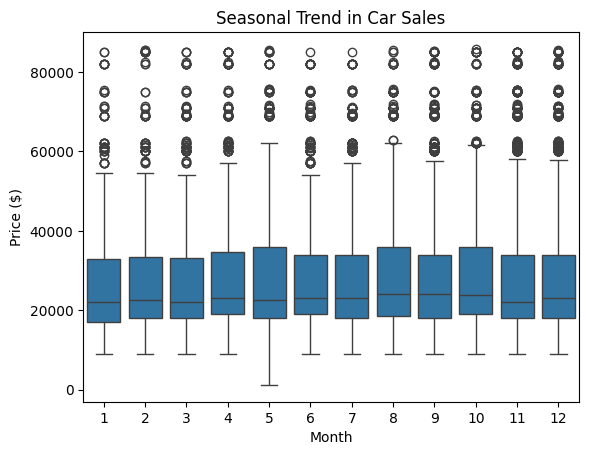

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sns.boxplot(x= 'Month', y= 'Price ($)', data=df)
plt.title('Seasonal Trend in Car Sales')
plt.show()

13.How does the price distribution vahnge when considering different combination of body style and transmission type?

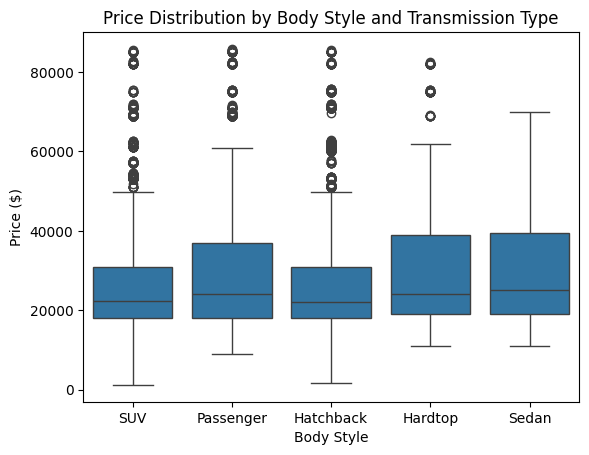

In [ ]:
sns.boxplot(x= 'Body Style', y= 'Price ($)', data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.show()

14.What is the correlation between car price,engine size, and annual income of customers, and how do these featires interact?

Correlation matrix:
               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


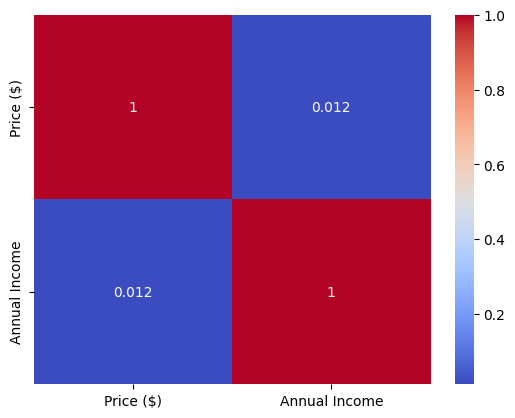

In [ ]:
correlation_matrix = df[['Price ($)', 'Annual Income']].corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
print("Correlation matrix:")
print(correlation_matrix)

15.How does the average car price vary across different car models and engine types?

In [ ]:
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average car price by car model and engine type:")
print(avg_price_model_engine)

Average car price by car model and engine type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


# EDA - 3

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ur1 = "/amazon.csv"
df = pd.read_csv(ur1)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


1.What is the average rating for each product category?

In [50]:

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating_by_category = df.groupby('category')['rating'].mean()
print("Average rating for each product category:")
average_rating_by_category

Average rating for each product category:


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


2.What are the top rating_count product category?

In [51]:


top_rated_categories = df.groupby('category')['rating_count'].sum().sort_values(ascending=False)
print("Top rated product categories by rating count:")
top_rated_categories


Top rated product categories by rating count:


,rating_count
category,
"Electronics|Headphones,Earbuds&Accessories|Headphones|On-Ear","97,1751,07,15133,58460,02613,79742,77597,17491..."
Computers&Accessories|NetworkingDevices|NetworkAdapters|BluetoothAdapters,"95,116"
Electronics|Cameras&Photography|SecurityCameras|DomeCameras,"93,1121,8803,60644,6965,554"
Computers&Accessories|Components|InternalSolidStateDrives,"92,9253,0292,515"
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Bags&Sleeves|LaptopSleeves&Slipcases,"9,94011,3309,7012,8681,09222,860"
...,...
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|HandlebarMounts,"1,193"
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,"1,118"
Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines,"1,06713,2512,4492,283"


3.What is the distribution of discounted prices vs. actual prices?

In [53]:

import pandas as pd

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating_by_category = df.groupby('category')['rating'].mean()
print("Average rating for each product category:")
average_rating_by_category


Average rating for each product category:


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


4.How does the average discount percentage vary across categories?

Average discount percentage for each product category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Penc

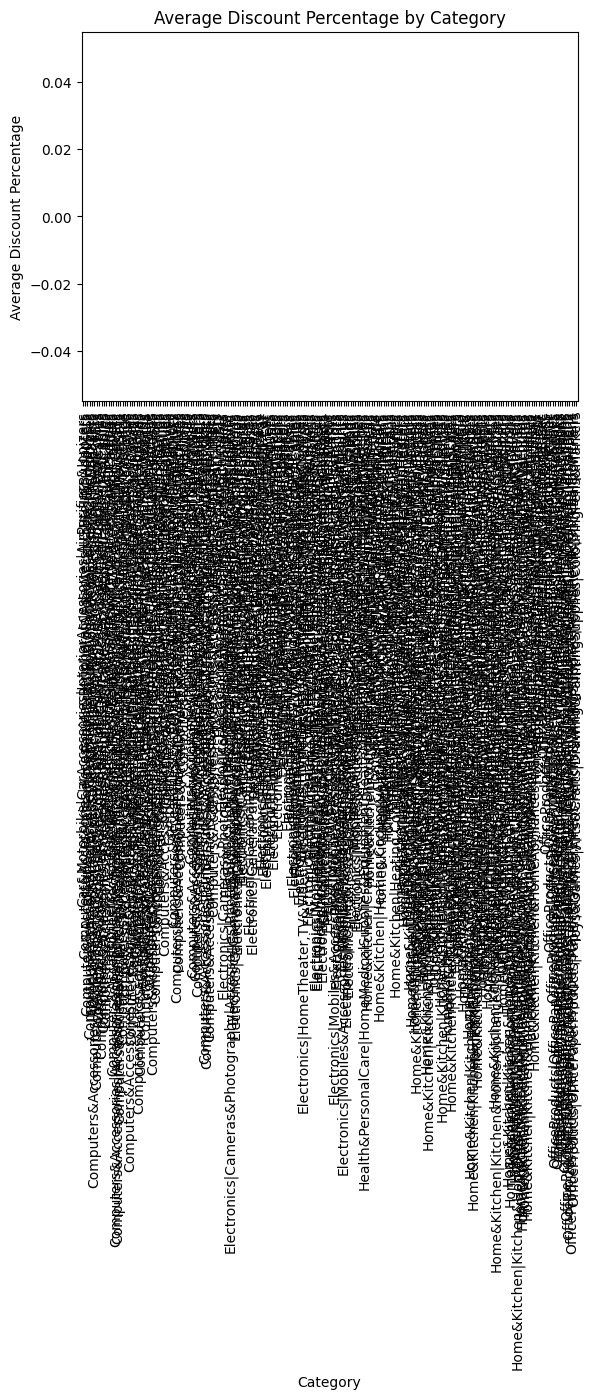

In [62]:


import pandas as pd
import matplotlib.pyplot as plt
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

average_discount_by_category = df.groupby('category')['discount_percentage'].mean()


print("Average discount percentage for each product category:")
print(average_discount_by_category)


average_discount_by_category.plot(kind='bar')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.show()


5.What are the most popular product names?

In [63]:


import pandas as pd
# Convert 'rating_count' column to numeric, handling errors
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Group by product name and sum the rating counts
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)

# Print the most popular product names
print("Most popular product names based on rating counts:")
print(popular_products.head(10))  # Display top 10, adjust as needed


Most popular product names based on rating counts:
product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One

6.What are the most popular product keywords?

In [56]:

from collections import Counter

def extract_keywords(text):

    keywords = text.lower().split()
    return keywords

all_keywords = []
for product_name in df['product_name']:
    if isinstance(product_name, str):
      all_keywords.extend(extract_keywords(product_name))

keyword_counts = Counter(all_keywords)

print("Most popular product keywords:")
print(keyword_counts.most_common(10))


Most popular product keywords:
- and: 5590
- the: 4342
- with: 3837
- for: 3226
- your: 1880
- usb: 1346
- you: 1256
- cable: 1026
- can: 891
- from: 775


7.What are the most popular product reviews?

In [65]:

from collections import Counter


df['product_name'] = df['product_name'].fillna('')
df['product_name'] = df['product_name'].str.lower()

def tokenize_review(review):
    return review.split()

df['tokens'] = df['product_name'].apply(tokenize_review)



all_review_words = []
for tokens in df['tokens']:
  all_review_words.extend(tokens)
word_counts = Counter(all_review_words)



print("Most popular product review words:")
print(word_counts.most_common(10))


review_counts = df['product_name'].value_counts()
print("\nMost frequent full reviews:")
print(review_counts.head(10))

Most popular product review words:
[('with', 751), ('for', 672), ('|', 457), ('&', 432), ('usb', 377), ('and', 330), ('cable', 320), ('-', 220), ('charging', 219), ('to', 218)]

Most frequent full reviews:
product_name
fire-boltt ninja call pro plus 1.83" smart watch with bluetooth calling, ai voice assistance, 100 sports modes ip67 rating, 240*280 pixel high resolution             5
fire-boltt phoenix smart watch with bluetooth calling 1.3",120+ sports modes, 240*240 px high res with spo2, heart rate monitoring & ip67 rating                      4
wayona nylon braided usb to lightning fast charging and data sync cable compatible for iphone 13, 12,11, x, 8, 7, 6, 5, ipad air, pro, mini (3 ft pack of 1, grey)    3
mi braided usb type-c cable for charging adapter (red)                                                                                                                3
amazonbasics nylon braided usb-c to lightning cable, fast charging mfi certified smartphone, iphone charger (

8.What are the  correlation between discounted_price and rating?

In [58]:


import pandas as pd

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


correlation = df['discounted_price'].corr(df['rating'])

print(f"The correlation between discounted_price and rating is: {correlation}")


The correlation between discounted_price and rating is: nan


9.What are the Top 5 categories based on the highest rating?

In [59]:

top_5_categories = average_rating_by_category.sort_values(ascending=False).head(5)
print("Top 5 categories based on highest average rating:")
top_5_categories


Top 5 categories based on highest average rating:


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


10.Identify any potential areas for improvement or optimization based on the data analysis.

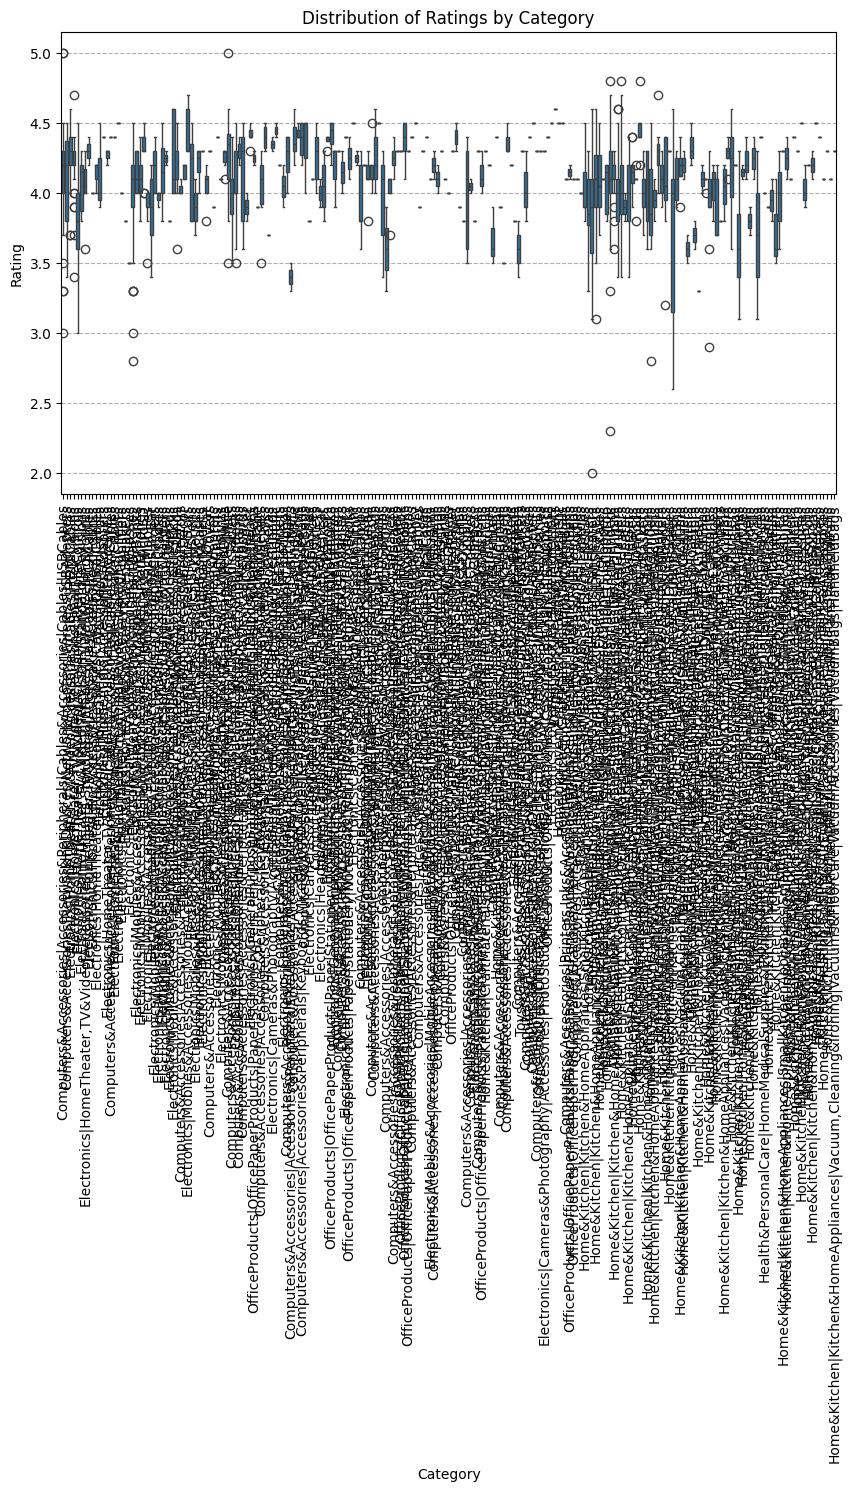

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='rating', data=df)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Category')
plt.grid(True, axis='y', linestyle='--')
plt.show()


# EDA - 4

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ur1 = "/spotify.csv"
df = pd.read_csv(ur1)
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


1.Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.

In [15]:
print("\nChecking for null values:")
print(df.isnull().sum())

print("\nChecking for duplicate rows:")
print(df.duplicated().sum())

df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()


Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows:
27


2.What is th distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

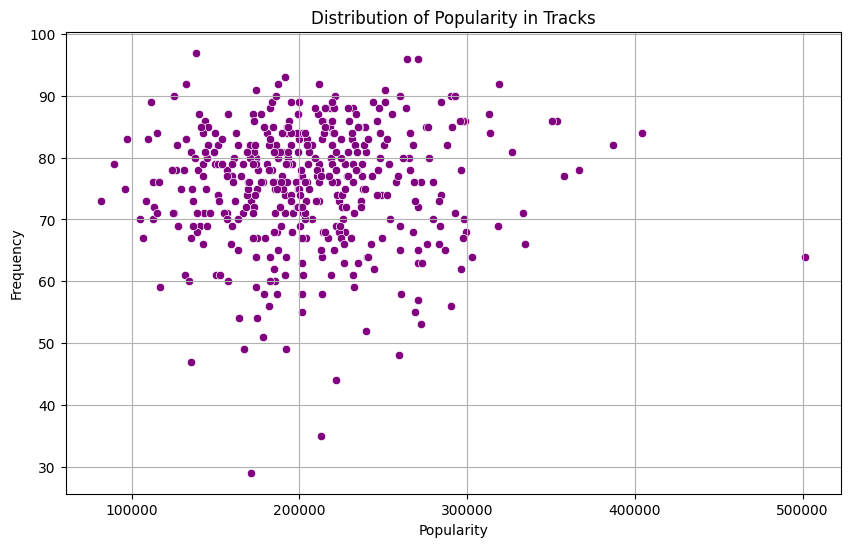

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df_cleaned, color='purple')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity in Tracks')
plt.grid(True)
plt.show()

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

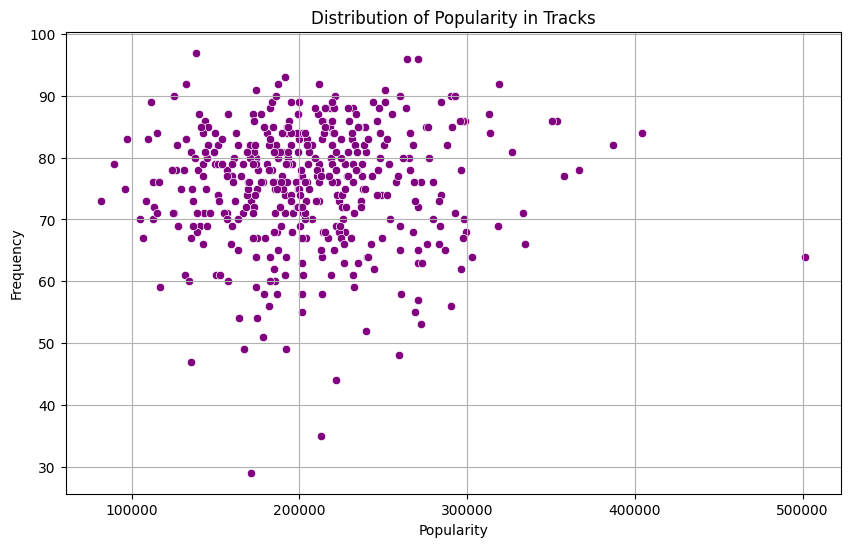

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df_cleaned, color='purple')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity in Tracks')
plt.grid(True)
plt.show()

4.Which artice has the highest number of tracks in the dataset?Display the count of tracks for each artist using a countplot.

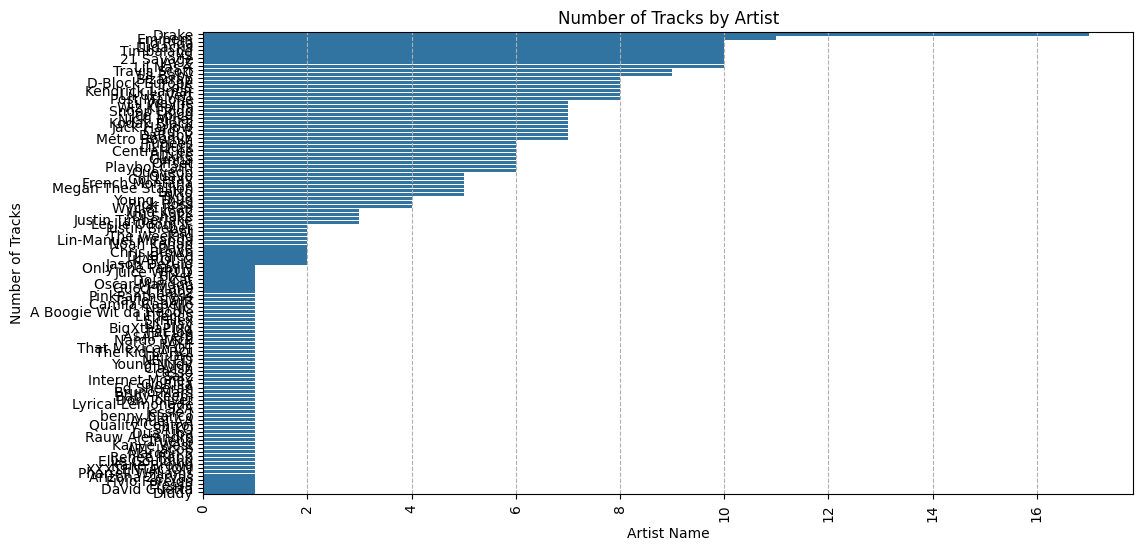

In [23]:
plt.figure(figsize=(12, 6))
top_artists = df_cleaned['Artist'].value_counts().head(10).index
sns.countplot(y='Artist', data=df_cleaned, order=df_cleaned['Artist'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks by Artist')
plt.grid(True, axis='x', linestyle='--')
plt.show()

5.What are the Top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [30]:
least_popular_tracks = df_cleaned.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6.Among the top 5 most popular artists, which artist has the highest popularity on average?Calculate and display the average popularity for each artist.

In [28]:
least_popular_tracks = df_cleaned['Artist'].value_counts().head(5).reset_index()
average_popularity = df_cleaned.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nAverage Popularity for Top 5 Artists:")
print(average_popularity)



Average Popularity for Top 5 Artists:
Artist
cassö             92.000000
Trueno            89.000000
David Guetta      87.000000
Travis Scott      86.555556
¥$                85.100000
                    ...    
RAYE              55.000000
Wyclef Jean       54.500000
Arizona Zervas    54.000000
Justin Bieber     49.000000
Pressa            29.000000
Name: Popularity, Length: 115, dtype: float64


7.for the top 5 most popular artist, what are their most popular track? List the track name for each artist.

In [34]:
most_popular_tracks = df_cleaned[df_cleaned['Artist'].isin(top_artists)].sort_values(by='Popularity', ascending=False).drop_duplicates('Artist')[['Artist', 'Track Name', 'Popularity']]

most_popular_tracks = df_cleaned[df_cleaned['Artist'].isin(top_artists)].sort_values(by='Popularity', ascending=False).drop_duplicates('Artist')[['Artist', 'Track Name', 'Popularity']]

print("\nMost Popular Tracks for Top 5 Artists:")
print(most_popular_tracks)
#print(most_popular_tracks) # removed extra print statement


Most Popular Tracks for Top 5 Artists:
           Artist                               Track Name  Popularity
70      21 Savage                                   redrum          96
260            ¥$                                 CARNIVAL          96
30   Travis Scott               FE!N (feat. Playboi Carti)          93
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80         Eminem                               Without Me          90
100         JAY-Z                          Ni**as In Paris          86
380     Timbaland                            The Way I Are          85
300      Flo Rida                       Low (feat. T-Pain)          84
312     Lil Nas X                        THATS WHAT I WANT          81
371      Ludacris                             My Chick Bad          67


8.Visualize relationships between multiple numnerical variables simultaneously using a pair plot.

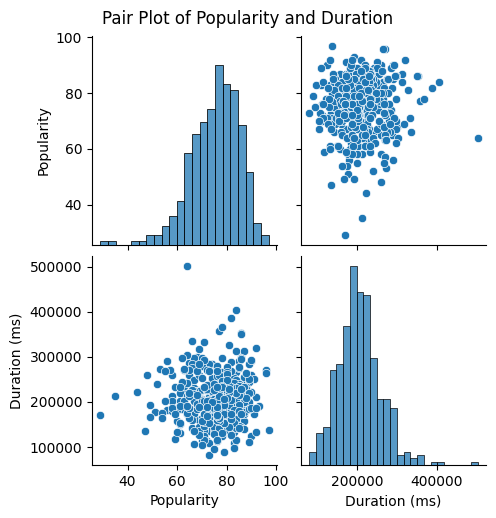

In [35]:
sns.pairplot(df_cleaned[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)
plt.show()

9.Does  the duration of tracks vary significantly across different artist?Explore this visually using a box plot or violin plot.

Text(0.5, 1.0, 'Duration of Tracks by Artist')

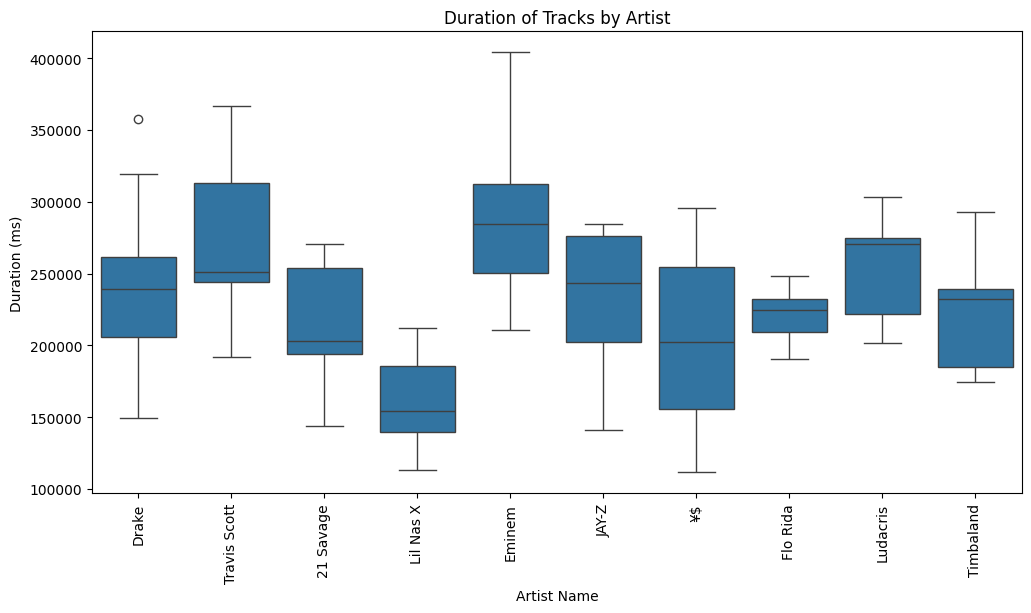

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_cleaned[df_cleaned['Artist'].isin(top_artists)])

plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks by Artist')
plt.xlabel('Artist Name')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks by Artist')

10.How does the distribution of track popularity vary for different artists?Visualize this using a swarm plot or a violin plot.

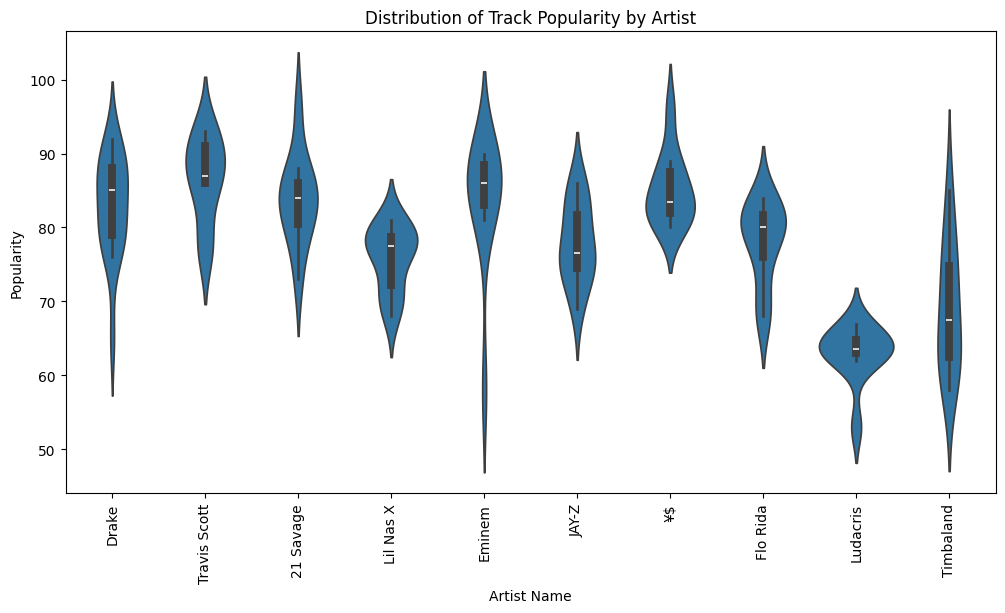

In [41]:
# prompt: 10.How does the distribution of track popularity vary for different artists?Visualize this using a swarm plot or a violin plot.

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df_cleaned[df_cleaned['Artist'].isin(top_artists)])
plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity by Artist')
plt.show()
